In [5]:
from banners import *
import numpy as np


robot_translation = np.array([0, 0, 1])
# q = np.array([0, 0, 0, 1])
# robot_rotation = R.from_quat([0, 0, 0, 1]).as_matrix()


cc = CameraCombo(None)
rgb_ground_points = cc.visionCone(PI_W, PI_H, np.eye(3), robot_translation, rbg_K)

[-1.27600274 -0.87306525  1.        ] [0.31295456 1.9499852  1.        ]
[-0.87306525  1.27600274  0.        ] [ 1.9499852  -0.31295456  0.        ]


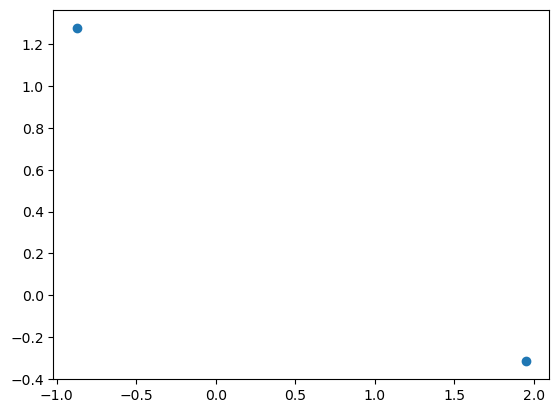

In [6]:
import matplotlib.pyplot as plt

plt.scatter(rgb_ground_points[:,0], rgb_ground_points[:,1])